<a href="https://colab.research.google.com/github/Augusta02/DataPreprocessing-Visualization-Exercises/blob/main/Cloud_Computing_Text_Mining_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
url = 'https://en.wikipedia.org/wiki/Cloud_computing'

In [29]:
import requests
text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Cloud computing - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"45d4204a-41e9-40b2-9665-2e2dfe22b34f","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Cloud_computing","wgTitle":"Cloud computing","wgCurRevisionId":1059266571,"wgRevisionId":1059266571,"wgArticleId":19541494,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["All articles with dead external links","Articles with dead external links from July 2018","CS1 errors: missing periodical","Articles with short de

In [30]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Cloud computing - Wikipedia Cloud computing From Wikipedia, the free encyclopedia Jump to navigation Jump to search Form of shared Internet-based computing For the horse, see  Cloud Computing . This article  may be  confusing or unclear  to readers . In particular, it is a poorly-written and -sourced article full of inaccuracies about a high-profile topic.  Please help  clarify the article . There is a discussion about this on  Talk:Cloud computing § Ungrammatical and Uninterpretable Language, Incoherent Scope/Purpose, Full of Misinformation . ( March 2021 )  ( Learn how and when to remove this template message ) Cloud computing metaphor: the group of networked elements providing services need not be individually addressed or managed by users; instead, the entire provider-managed suite of hardware and software can be thought of as an amorphous cloud. Cloud computing [1]  is the on-demand availability of  computer system resources , especially data storage ( cloud storage ) and  comput

In [31]:
import sys
!{sys.executable} -m pip install nlp_rake

In [33]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=4,min_chars=7)
res = extractor.apply(text)
res

[('data center', 4.0),
 ('citation needed', 4.0),
 ('international journal', 4.0),
 ('unsourced statements', 4.0),
 ('cloud users', 3.994047619047619),
 ('public cloud', 3.994047619047619),
 ('hybrid cloud', 3.994047619047619),
 ('cloud computing', 3.9707918050941307),
 ('retrieved 2010-08-22', 3.883720930232558),
 ('cloud providers', 3.869047619047619),
 ('private clouds', 3.833333333333333),
 ('private cloud', 3.8273809523809526),
 ('main article', 3.7777777777777777),
 ('network world', 3.736842105263158),
 ('virtual machines', 3.7333333333333334),
 ('operating systems', 3.723809523809524),
 ('cloud storage', 3.494047619047619),
 ('cloud infrastructure', 3.301739926739927),
 ('network', 1.736842105263158),
 ('information', 1.7142857142857142),
 ('business', 1.7058823529411764),
 ('provider', 1.6923076923076923),
 ('application', 1.6666666666666667),
 ('resources', 1.6),
 ('software', 1.5833333333333333),
 ('service', 1.5),
 ('storage', 1.5),
 ('organization', 1.5),
 ('privacy', 1.5)

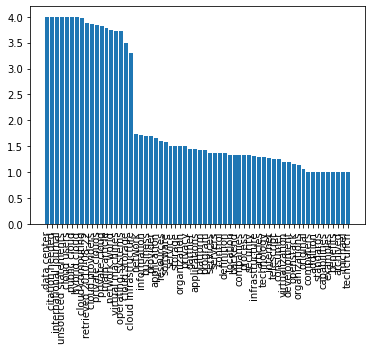

In [34]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

In [35]:
!{sys.executable} -m pip install wordcloud

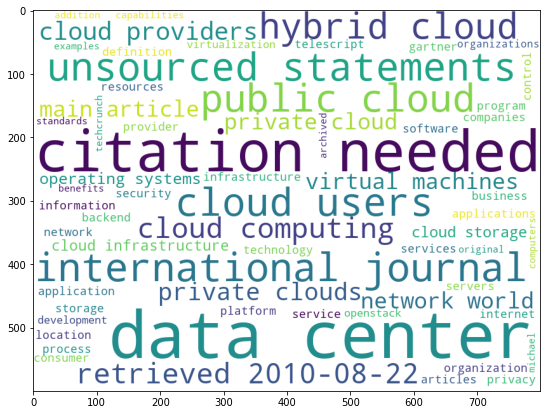

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))